<a href="https://colab.research.google.com/github/archie-cm/Churn-Analysis-Ecommerce-Customer/blob/main/Supervised_Classification_Churn_Analysis_Ecommerce_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 34.9 MB/s 


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.2 MB/s 


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 32.6 MB/s 
     |████████████████████████████████| 133 kB 74.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=95babea0b034e42c9ebb8304f9595c0a2a79822753abd7e0c5799d0097486ce7
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import plotly.graph_objs as go
import plotly.express as ex
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import chi2
import shap


import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split,StratifiedKFold, RandomizedSearchCV, KFold
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import catboost as cb
import os

from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.calibration import calibration_curve 
from sklearn.metrics import brier_score_loss

! pip install lifelines==0.25.5
import lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 345 kB 28.8 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=072b9a8bfd6e2629d2fe408f4c642bcfeb1151e736acc1059996e27ff0a51065
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


## Exploratory Data Analysis (EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
description = pd.read_excel('/content/drive/MyDrive/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('/content/drive/MyDrive/E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Pada tahapan EDA ini akan dilakukan :

1. Pengujian korelasi untuk mengetahui feature mana saja yang berpengaruh kuat terhadap label (Churn)
2. Informasi dari proporsi masing - masing feature terhadap label (Churn) untuk melihat karakterstiknya
3. Karakteristik dan faktor yang berpengaruh terhadap label (Churn)

In [ ]:
data_churn = data[data['Churn']==1].copy()
data_churn.drop(['Churn','CustomerID'], axis=1, inplace= True)

Melakukan filter terhadap data churn saja untuk dianalisis lebih lanjut karakteristiknya.

In [ ]:
fig = ex.pie(data,names='Churn')
fig.update_layout(title='<b>Proportion Of Churn Samples<b>')
fig.show()

16.8% Kostumer churn dan 83.2% kostumer tidak churn, dengan kata lain perusahaan kehilangan revenue sebanyak 16.8% dari kostumer churn. Dari grafik terlihat data memiliki imbalance sehingga dapat dilakukan treatment untuk menjadi salah satu alternatif solusi untuk meningkatkan nilai recall.

## Data Preprocessing

Pada tahap ini, akan dilakukan cleaning pada data untuk kebutuhan proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
1. Melakukan pengecekan terhadap duplikat data, missing value, dan drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
2. Melakukan treatment terhadap missing value jika ada. Hal ini dilakukan dengan cara men-drop fiturnya jika memang tidak dibutuhkan, mendrop data duplikat, menyatukan fitur yang memiliki kemiripan nama, mengganti nama data menjadi nama yang lebih umum dipakai dan  mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

#### Dropping irrelevant columns

Terdapat beberapa pertimbangan dalam melakukan drop kolom. Untuk mengetahui kolom mana saja yang akan di drop, kita menggunakan domain knowledge untuk memutuskan fitur mana saja yang dirasa tidak relevan.

Berdasarkan domain knowledge kolom 'CustomerID' tidak memiliki relevansi dan kepentingan untuk analisis prediktif. kolom 'CustomerID' tidak diperlukan karena hanya menerangkan ID Customer dimana setiap customer memiliki ID yang unik.

In [ ]:
data=data.drop(['CustomerID'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Handling Duplicate Value

Pada tahap ini akan dilakukan penggabungan untuk feature yang memiliki kesamaan nilai namun terdapat perbedaan dalam penulisannya.

In [ ]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Dalam kolom 'PreferredLoginDevice' yang berarti pelanggan menggunakan perangkat jenis apa dalam mengakses online ecommerce perusahaan terdapat kesamaan makna antara 'Mobile Phone' dengan 'Phone' dimana hal tersebut dapat disatukan / disamakan nilainya menjadi 'Mobile Phone'.

In [ ]:
data.loc[data['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

In [ ]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Dalam kolom 'PreferredPaymentMode' yang berarti pelanggan menggunakan metode pembayaran apa dalam transaksi di online ecommerce perusahaan terdapat kesamaan makna antara 'Credit Card' dengan 'CC' dimana hal tersebut dapat disatukan / disamakan nilainya menjadi 'Credit Card', lalu 'Cash on Delivery' dengan 'COD' dapat disatukan nilainua menjadi 'Cash on Delivery'.

In [ ]:
data.loc[data['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
data.loc[data['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
data['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Dalam kolom 'PreferedOrderCat' yang berarti jenis produk yang banyak dibeli oleh pelanggan di online ecommerce perusahaan terdapat kesamaan makna antara 'Mobile Phone' dengan 'Mobile' dimana hal tersebut dapat disatukan / disamakan nilainya menjadi 'Mobile Phone'.

In [ ]:
data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [ ]:
data['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [ ]:
data['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [ ]:
data['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

### Handling Duplicate Data

Pada tahap ini akan dihapus untuk baris data yang memiliki nilai yang sama.

In [ ]:
print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  557


Terdapat 557 baris yang memiliki kesamaan nilai, selanjutnya baris tersebut akan dihapus.

In [ ]:
# Drop duplicate data
data.drop_duplicates(inplace=True)

# Cehck duplicate data
print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  0


### Handling Missing Value

Pada tahap ini akan dilakukan analisis terhadap data missing value seperti penyebab hingga solusi untuk mengatasinya.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5073 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5073 non-null   int64  
 1   Tenure                       4842 non-null   float64
 2   PreferredLoginDevice         5073 non-null   object 
 3   CityTier                     5073 non-null   int64  
 4   WarehouseToHome              4852 non-null   float64
 5   PreferredPaymentMode         5073 non-null   object 
 6   Gender                       5073 non-null   object 
 7   HourSpendOnApp               4843 non-null   float64
 8   NumberOfDeviceRegistered     5073 non-null   int64  
 9   PreferedOrderCat             5073 non-null   object 
 10  SatisfactionScore            5073 non-null   int64  
 11  MaritalStatus                5073 non-null   object 
 12  NumberOfAddress              5073 non-null   int64  
 13  Complain          

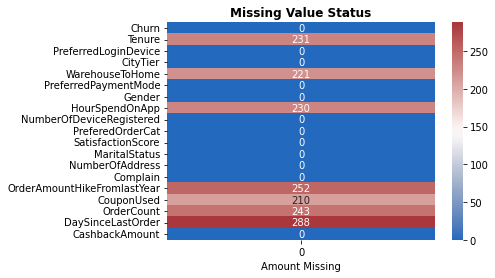

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [ ]:
percentage_of_null_values = ((data.isnull().sum())*100/len(data)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.677114
OrderAmountHikeFromlastYear    4.967475
OrderCount                     4.790065
Tenure                         4.553519
HourSpendOnApp                 4.533806
WarehouseToHome                4.356397
CouponUsed                     4.139562
Churn                          0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

In [ ]:
null_values = ((data.isnull().sum())).sort_values(ascending = False)
null_values

DaySinceLastOrder              288
OrderAmountHikeFromlastYear    252
OrderCount                     243
Tenure                         231
HourSpendOnApp                 230
WarehouseToHome                221
CouponUsed                     210
Churn                            0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

Dapat dilihat terdapat 7 feature memiliki missing value dengan presentase > 4%, sehingga harus dilakukan penyesuaian agar tidak bermasalah untuk model. Sebelum memutuskan akan diselesaikan dengan cara seperti apa, kita harus mengetahui terlebih dahulu potensi penyebab data tersebut missing.

#### Missing Value : DaySinceLastOrder

In [ ]:
data["DaySinceLastOrder"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

DaySinceLastOrder merupakan rentang hari sejak transaksi terakhir, nilai 'nan' bisa jadi karena pelanggan baru atau pelanggan tersebut baru pertama kali melakukan transaksi. Oleh karena itu untuk membuktikan asumsi tersebut dilakukan pengecekan total order yang pernah dilakukan untuk data yang DaySinceLastOrder yang missing. 

In [ ]:
data_null = data[data['DaySinceLastOrder'].isna()].copy()
data_null

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
88,0,24.0,Mobile Phone,1,14.0,Debit Card,Male,2.0,4,Fashion,4,Divorced,6,0,16.0,1.0,4.0,NaN,224.90
97,0,10.0,Computer,1,17.0,UPI,Male,2.0,3,Fashion,2,Married,2,1,14.0,0.0,1.0,NaN,221.85
126,0,12.0,Computer,1,8.0,Cash on Delivery,Female,3.0,3,Fashion,3,Single,1,0,25.0,10.0,11.0,NaN,209.38
146,1,10.0,Computer,1,35.0,Debit Card,Male,2.0,3,Fashion,4,Divorced,2,1,12.0,5.0,9.0,NaN,218.49
151,0,2.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,2,Fashion,4,Married,8,0,18.0,5.0,6.0,NaN,219.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,0,21.0,Mobile Phone,1,32.0,Credit Card,Male,3.0,4,Fashion,3,Single,4,0,24.0,10.0,13.0,NaN,211.33
5591,0,6.0,Mobile Phone,3,8.0,E wallet,Female,3.0,4,Fashion,1,Married,3,0,20.0,1.0,6.0,NaN,229.22
5608,0,15.0,Mobile Phone,3,10.0,Debit Card,Male,3.0,5,Laptop & Accessory,4,Married,4,0,12.0,2.0,2.0,NaN,214.38
5623,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36


In [ ]:
data_null[data_null['OrderCount']<1]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [ ]:
data_null[data_null['OrderCount'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


Dapat dilihat untuk nilai DaySinceLastOrder yang missing, seluruhnya memiliki nilai ordercount >= 1. Artinya data tersebut bukan merepresentasikan pelanggan baru atau pelanggan yang pertama kali melakukan transaksi. Dimungkinkan missing value disebabkan karena data tidak terinput.

#### Missing Value : OrderAmountHikeFromlastYear

In [ ]:
data["OrderAmountHikeFromlastYear"].unique()

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

OrderAmountHikeFromlastYear merupakan Kenaikan presentase transaksi dari tahun lalu, nilai 'nan' bisa jadi karena pelanggan baru atau pelanggan tersebut baru pertama kali melakukan transaksi. Oleh karena itu untuk membuktikan asumsi tersebut dilakukan pengecekan total order yang pernah dilakukan untuk data yang OrderAmountHikeFromlastYear yang missing.

In [ ]:
data_null = data[data['OrderAmountHikeFromlastYear'].isna()].copy()
data_null

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,NaN,9.0,15.0,8.0,295.45
40,0,23.0,Mobile Phone,1,17.0,Debit Card,Female,2.0,3,Others,4,Single,4,0,NaN,2.0,4.0,4.0,299.26
65,0,25.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Others,3,Divorced,1,0,NaN,1.0,11.0,9.0,299.99
106,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,NaN,0.0,11.0,15.0,292.32
108,0,23.0,Mobile Phone,3,6.0,Credit Card,Female,3.0,3,Others,2,Married,4,0,NaN,1.0,1.0,6.0,295.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5511,0,22.0,Computer,1,29.0,Credit Card,Female,3.0,4,Grocery,1,Married,5,0,NaN,2.0,5.0,8.0,296.74
5534,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5537,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5597,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31


In [ ]:
data_null[data_null['OrderCount']<1]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [ ]:
data_null[data_null['OrderCount'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


Dapat dilihat untuk nilai OrderAmountHikeFromlastYear yang missing, seluruhnya memiliki nilai ordercount >= 1. Artinya data tersebut bukan merepresentasikan pelanggan baru atau pelanggan yang pertama kali melakukan transaksi. Dimungkinkan missing value disebabkan karena data tidak terinput.

#### Missing Value : Tenure

In [ ]:
data["Tenure"].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

Tenure merupakan masa berlangganan dari pelanggan, Pelanggan baru sudah direpresentasikan dengan nilai 0, kemungkinan nilai 'nan' karena tidak terinput.

#### Missing Value : OrderCount

In [ ]:
data["OrderCount"].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

OrderCount merupakan Total order pada bulan lalu, nilai 'nan' bisa jadi karena pelanggan baru atau pelanggan tersebut baru pertama kali melakukan transaksi. Oleh karena itu untuk membuktikan asumsi tersebut dilakukan pengecekan terhadap adanya peningkatan transaksi yang dilakukan untuk data yang OrderCount yang missing.

In [ ]:
data_null = data[data['OrderCount'].isna()].copy()
data_null

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
64,0,24.0,Mobile Phone,1,9.0,Credit Card,Female,3.0,3,Grocery,4,Single,4,0,18.0,0.0,NaN,0.0,237.34
90,0,14.0,Mobile Phone,3,12.0,Debit Card,Female,3.0,3,Fashion,2,Single,4,1,18.0,0.0,NaN,0.0,235.91
110,0,16.0,Mobile Phone,3,22.0,E wallet,Female,3.0,3,Grocery,2,Divorced,6,1,22.0,0.0,NaN,9.0,260.64
120,0,4.0,Computer,1,9.0,Credit Card,Male,3.0,3,Fashion,3,Married,10,0,12.0,1.0,NaN,2.0,236.75
143,0,18.0,Mobile Phone,1,26.0,Credit Card,Male,3.0,3,Grocery,2,Divorced,1,1,14.0,0.0,NaN,10.0,234.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,0,16.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,4,Fashion,5,Married,11,0,14.0,6.0,NaN,8.0,258.48
5581,0,21.0,Computer,1,8.0,Credit Card,Female,4.0,4,Fashion,4,Married,2,0,19.0,1.0,NaN,13.0,244.57
5590,0,12.0,Mobile Phone,1,17.0,Credit Card,Female,4.0,6,Fashion,3,Married,5,0,13.0,1.0,NaN,12.0,257.06
5621,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,233.54


In [ ]:
data_null[data_null['OrderAmountHikeFromlastYear']<1]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [ ]:
data_null[data_null['OrderAmountHikeFromlastYear'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


Dapat dilihat untuk nilai OrderCount yang missing, seluruhnya memiliki nilai OrderAmountHikeFromlastYear > 1. Artinya data tersebut bukan merepresentasikan pelanggan baru atau pelanggan yang pertama kali melakukan transaksi. Dimungkinkan missing value disebabkan karena data tidak terinput.

#### Missing Value : CouponUsed

In [ ]:
data["CouponUsed"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

CouponUsed merupakan Total penggunanaan kupon pada bulan lalu, nilai 'nan' bisa jadi karena pelanggan baru atau pelanggan tersebut baru pertama kali melakukan transaksi. Oleh karena itu untuk membuktikan asumsi tersebut dilakukan pengecekan total order yang pernah dilakukan untuk data yang OrderAmountHikeFromlastYear yang missing.

In [ ]:
data_null = data[data['CouponUsed'].isna()].copy()
data_null

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
61,0,13.0,Mobile Phone,1,10.0,Credit Card,Female,2.0,3,Others,3,Divorced,2,0,14.0,NaN,9.0,9.0,290.33
62,0,28.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,2,Others,4,Single,9,0,11.0,NaN,2.0,15.0,287.22
69,0,18.0,Computer,1,8.0,Credit Card,Male,3.0,4,Grocery,2,Divorced,10,0,23.0,NaN,11.0,8.0,267.92
112,0,25.0,Computer,3,8.0,Debit Card,Male,3.0,4,Others,3,Single,2,1,18.0,NaN,15.0,12.0,290.68
138,0,19.0,Mobile Phone,3,8.0,Cash on Delivery,Female,3.0,5,Grocery,4,Divorced,4,1,12.0,NaN,7.0,7.0,268.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,0,29.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,2,Grocery,1,Married,4,0,14.0,NaN,2.0,1.0,272.32
5238,0,18.0,Mobile Phone,1,35.0,Debit Card,Male,3.0,4,Grocery,5,Married,5,0,14.0,NaN,15.0,18.0,288.28
5240,0,20.0,Mobile Phone,3,10.0,Debit Card,Female,3.0,4,Grocery,4,Married,10,0,13.0,NaN,6.0,2.0,291.06
5355,0,23.0,Mobile Phone,1,8.0,Debit Card,Male,3.0,4,Grocery,3,Single,6,0,15.0,NaN,2.0,1.0,278.79


In [ ]:
data_null[data_null['OrderCount']<1]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [ ]:
data_null[data_null['OrderCount'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


Dapat dilihat untuk nilai CouponUsed yang missing, seluruhnya memiliki nilai ordercount >= 1. Artinya data tersebut bukan merepresentasikan pelanggan baru atau pelanggan yang pertama kali melakukan transaksi. Dimungkinkan missing value disebabkan karena data tidak terinput.

#### Missing Value : HourSpendOnApp

In [ ]:
data["HourSpendOnApp"].unique()

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

HourSpendOnApp merupakan lama waktu pelanggan online di aplikasi, Pelanggan baru sudah direpresentasikan dengan nilai 0, kemungkinan nilai 'nan' karena tidak terinput.

#### Missing Value : WarehouseToHome

In [ ]:
data["WarehouseToHome"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

WarehouseToHome merupakan Jarak gudang ke alamat pelanggan, kemungkinan nilai 'nan' karena tidak terinput.

Text(0, 0.5, 'Values')

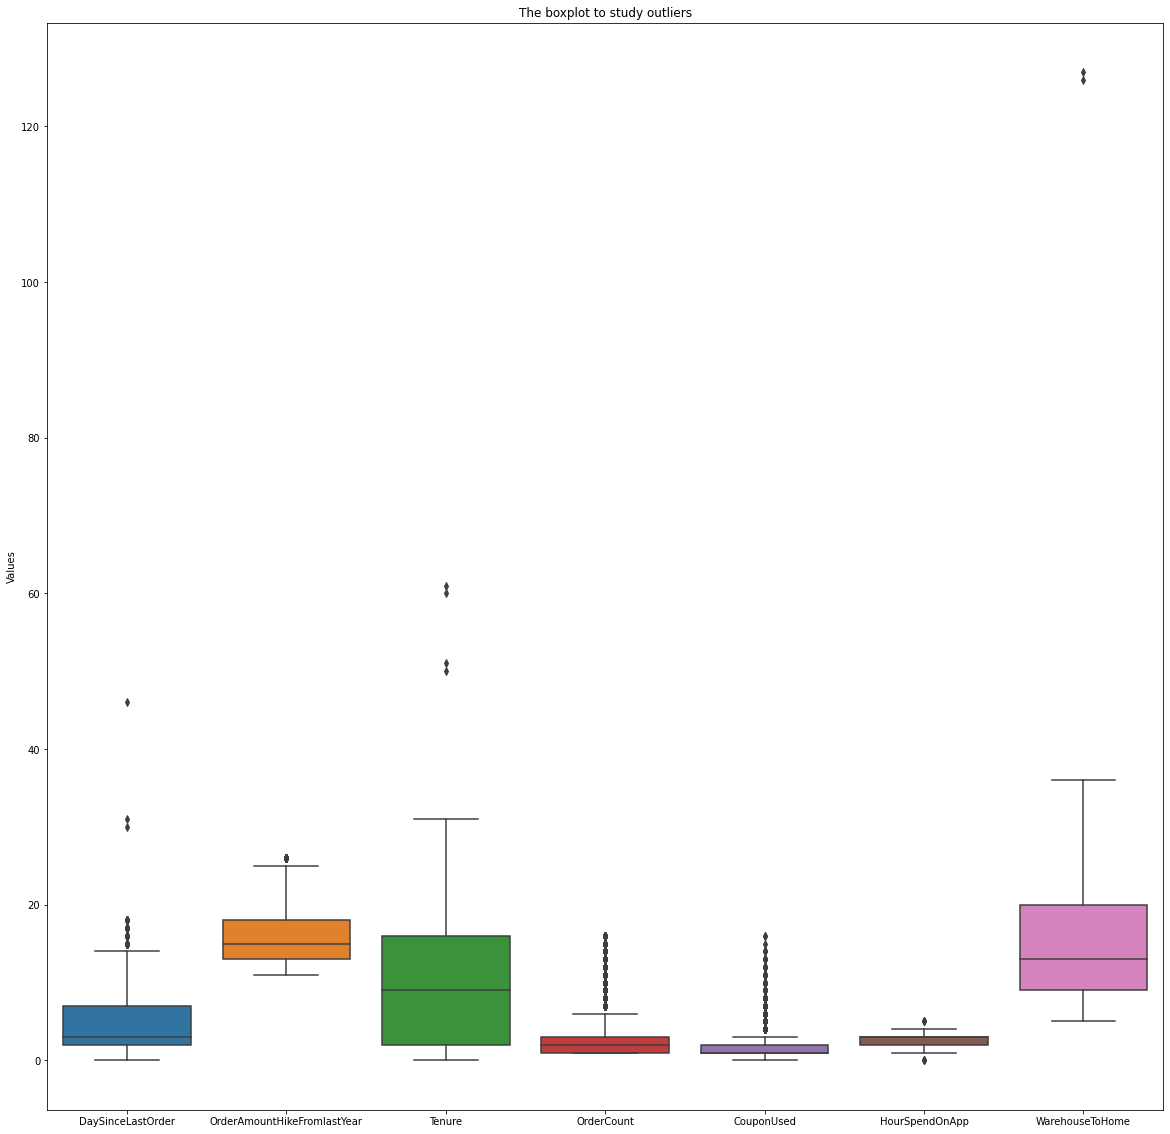

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=data[['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp','WarehouseToHome']])
plt.title('The boxplot to study outliers')
plt.ylabel('Values')

In [ ]:
data[['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp','WarehouseToHome']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DaySinceLastOrder,4785.0,4.580982,3.662407,0.0,2.0,3.0,7.0,46.0
OrderAmountHikeFromlastYear,4821.0,15.714582,3.681829,11.0,13.0,15.0,18.0,26.0
Tenure,4842.0,10.212929,8.590737,0.0,2.0,9.0,16.0,61.0
OrderCount,4830.0,3.093789,2.995493,1.0,1.0,2.0,3.0,16.0
CouponUsed,4863.0,1.805881,1.947097,0.0,1.0,1.0,2.0,16.0
HourSpendOnApp,4843.0,2.929176,0.723807,0.0,2.0,3.0,3.0,5.0
WarehouseToHome,4852.0,15.545136,8.599439,5.0,9.0,13.0,20.0,127.0


Dari grafik dan tabel diatas, didapatkan bahwa feature yang memiliki missing value adalah feature yang memiliki nilai numerik. Untuk itu akan dilakukan handling missing value dengan beberapa cara dengan mempertimbangkan rentang nilai min - max, rentang Q1 - Q3 dan hubungan antar feature akan disesuaikan dengan kondisi missing value dari masing - masing feature, yaitu:

1. 'DaySinceLastOrder' memiliki rentang nilai 0 - 46 dan range antara Q1 hingga Q3 dengan nilai 2 - 7 serta terdapat outlier dalam data, dengan memperhitungkan lebarnya range antara nilai minimum dan maksimum serta hubungan dengan fitur lainnya maka akan dilakukan pengisian missing value menggunakan metode iterative imputer dengan regression model. 


2. 'OrderAmountHikeFromlastYear' memiliki rentang nilai 11 - 26 dan range antara Q1 hingga Q3 dengan nilai 13 - 18 serta terdapat outlier dalam data, dengan memperhitungkan lebarnya range antara nilai minimum dan maksimum serta hubungan dengan fitur lainnya maka akan dilakukan pengisian missing value menggunakan metode iterative imputer dengan regression model.


3. 'Tenure' memiliki rentang nilai 0 - 61 dan range antara Q1 hingga Q3 dengan nilai 2 - 16 serta terdapat outlier dalam data, dengan memperhitungkan lebarnya range antara nilai minimum dan maksimum serta hubungan dengan fitur lainnya maka akan dilakukan pengisian missing value menggunakan metode iterative imputer dengan regression model.  


4. 'OrderCount' memiliki rentang nilai 1 - 16 dan range antara Q1 hingga Q3 dengan nilai 1 - 3 serta terdapat outlier dalam data, dengan memperhitungkan lebarnya range antara nilai minimum dan maksimum serta hubungan dengan fitur lainnya maka akan dilakukan pengisian missing value menggunakan metode iterative imputer dengan regression model.


5. 'CouponUsed' memiliki rentang nilai 0 - 16 dan range antara Q1 hingga Q3 dengan nilai 1 - 2 serta terdapat outlier dalam data, dengan memperhitungkan lebarnya range antara nilai minimum dan maksimum serta hubungan dengan fitur lainnya maka akan dilakukan pengisian missing value menggunakan metode iterative imputer dengan regression model.


6. 'HourSpendOnApp' memiliki rentang nilai 0 - 5 dan range antara Q1 hingga Q3 dengan nilai 2 - 3 serta terdapat outlier dalam data, dengan mempertimbang kecilnya range antara nilai minimum dan maksimum maka akan dilakukan pengisian missing value menggunakan metode simple imputer dengan nilai median.


7. 'WarehouseToHome' memiliki rentang nilai 5 - 127 dan range antara Q1 hingga Q3 dengan nilai 9 - 20 serta terdapat outlier dalam data, dengan memperhitungkan lebarnya range antara nilai minimum dan maksimum serta hubungan dengan fitur lainnya maka akan dilakukan pengisian missing value menggunakan metode iterative imputer dengan regression model.

Iterative imputer merupakan salah satu metode pengisian missing value yang menggunakan fitur lain yang ada dalam data untuk membuat regresi model sehingga menghasilkan suatu nilai untuk missing value tersebut.

Untuk pengisian missing value sesuai penjelasan diatas akan dilakukan bersamaan dengan encoding menggunakan transformer.

## Handling Outliers

Pada tahap ini akan dilakukan analisis terhadap data outlier menggunakan metode mahalanobis distance. Namun sebelum itu kita harus melakukan pengisian atas missing value karena mahalanobis distance tidak bisa menerima data 'NaN'.

In [ ]:
data_out = data.copy()

Penyalinan data untuk pengolahan data outlier.

In [ ]:
SI_var = ['HourSpendOnApp']
imputer = SimpleImputer(strategy= 'median')      
data_out[SI_var] = imputer.fit_transform(data_out[SI_var])

In [ ]:
null_values = ((data_out.isnull().sum())).sort_values(ascending = False)
null_values

DaySinceLastOrder              288
OrderAmountHikeFromlastYear    252
OrderCount                     243
Tenure                         231
WarehouseToHome                221
CouponUsed                     210
Churn                            0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
NumberOfDeviceRegistered         0
HourSpendOnApp                   0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

Pengisian missing value menggunakan simple imputer.

In [ ]:
IT_var = ['DaySinceLastOrder','OrderCount','Tenure','WarehouseToHome','CouponUsed','OrderAmountHikeFromlastYear']
imputer = IterativeImputer()      
data_out[IT_var] = imputer.fit_transform(data_out[IT_var])

In [ ]:
null_values = ((data_out.isnull().sum())).sort_values(ascending = False)
null_values

Churn                          0
SatisfactionScore              0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
PreferedOrderCat               0
Tenure                         0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
CashbackAmount                 0
dtype: int64

Pengisian missing value menggunakan iterativ imputer model regresi.

### Mahalanobis

Mahalanobis adalah suatu metode untuk menangani beberapa data outlier sekaligus (multivariat outlier) dengan mengukur mahalanobis distance dari setiap data outlier. Dari output mahalanobis distance tersebut dilakukan pengujian chi squared test untuk mendapat pvalue dari data. Nilai pvalue < 0.001 lah yang nantinya dikategorikan sebagai outlier. 

In [ ]:
def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data)
    
    if not cov:
        cov = np.cov(data.values.T)
        
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [ ]:
numerical_data = data_out[['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp','WarehouseToHome']]

numerical_data['Mahalanobis_Dis'] = mahalanobis(x=numerical_data, 
                                    data=numerical_data[['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp','WarehouseToHome']])
numerical_data

,DaySinceLastOrder,OrderAmountHikeFromlastYear,Tenure,OrderCount,CouponUsed,HourSpendOnApp,WarehouseToHome,Mahalanobis_Dis
0,5.000000,11.0,4.000000,1.0,1.0,3.0,6.0,4.325583
1,0.000000,15.0,8.255998,1.0,0.0,3.0,8.0,2.980927
2,3.000000,14.0,8.656640,1.0,0.0,2.0,30.0,5.649350
3,3.000000,23.0,0.000000,1.0,0.0,2.0,15.0,8.434177
4,3.000000,11.0,0.000000,1.0,1.0,3.0,12.0,3.628556
...,...,...,...,...,...,...,...,...
5623,3.598384,20.0,5.000000,2.0,2.0,4.0,12.0,4.386233
5624,1.000000,19.0,1.000000,2.0,2.0,2.0,12.0,5.395190
5626,4.048037,16.0,13.000000,2.0,1.0,3.0,13.0,0.492522
5627,4.000000,21.0,1.000000,2.0,1.0,3.0,11.0,3.908849


Pada tabel diatas didapatkan nilai dari mahalanobis distance untuk masing - masing baris, dari nilai tersebut akan dihitung nilai pvalue menggunakan chi squared test untuk mengetahui mana saja data yang benar - benar tergolong outlier.

In [ ]:
numerical_data['p_value'] = 1 - chi2.cdf(numerical_data['Mahalanobis_Dis'], 3)
numerical_data

,DaySinceLastOrder,OrderAmountHikeFromlastYear,Tenure,OrderCount,CouponUsed,HourSpendOnApp,WarehouseToHome,Mahalanobis_Dis,p_value
0,5.000000,11.0,4.000000,1.0,1.0,3.0,6.0,4.325583,0.228386
1,0.000000,15.0,8.255998,1.0,0.0,3.0,8.0,2.980927,0.394575
2,3.000000,14.0,8.656640,1.0,0.0,2.0,30.0,5.649350,0.129974
3,3.000000,23.0,0.000000,1.0,0.0,2.0,15.0,8.434177,0.037841
4,3.000000,11.0,0.000000,1.0,1.0,3.0,12.0,3.628556,0.304468
...,...,...,...,...,...,...,...,...,...
5623,3.598384,20.0,5.000000,2.0,2.0,4.0,12.0,4.386233,0.222665
5624,1.000000,19.0,1.000000,2.0,2.0,2.0,12.0,5.395190,0.145044
5626,4.048037,16.0,13.000000,2.0,1.0,3.0,13.0,0.492522,0.920531
5627,4.000000,21.0,1.000000,2.0,1.0,3.0,11.0,3.908849,0.271477


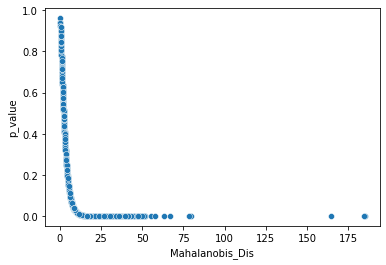

In [ ]:
sns.scatterplot(data=numerical_data, x="Mahalanobis_Dis", y="p_value")

Text(0, 0.5, 'Values')

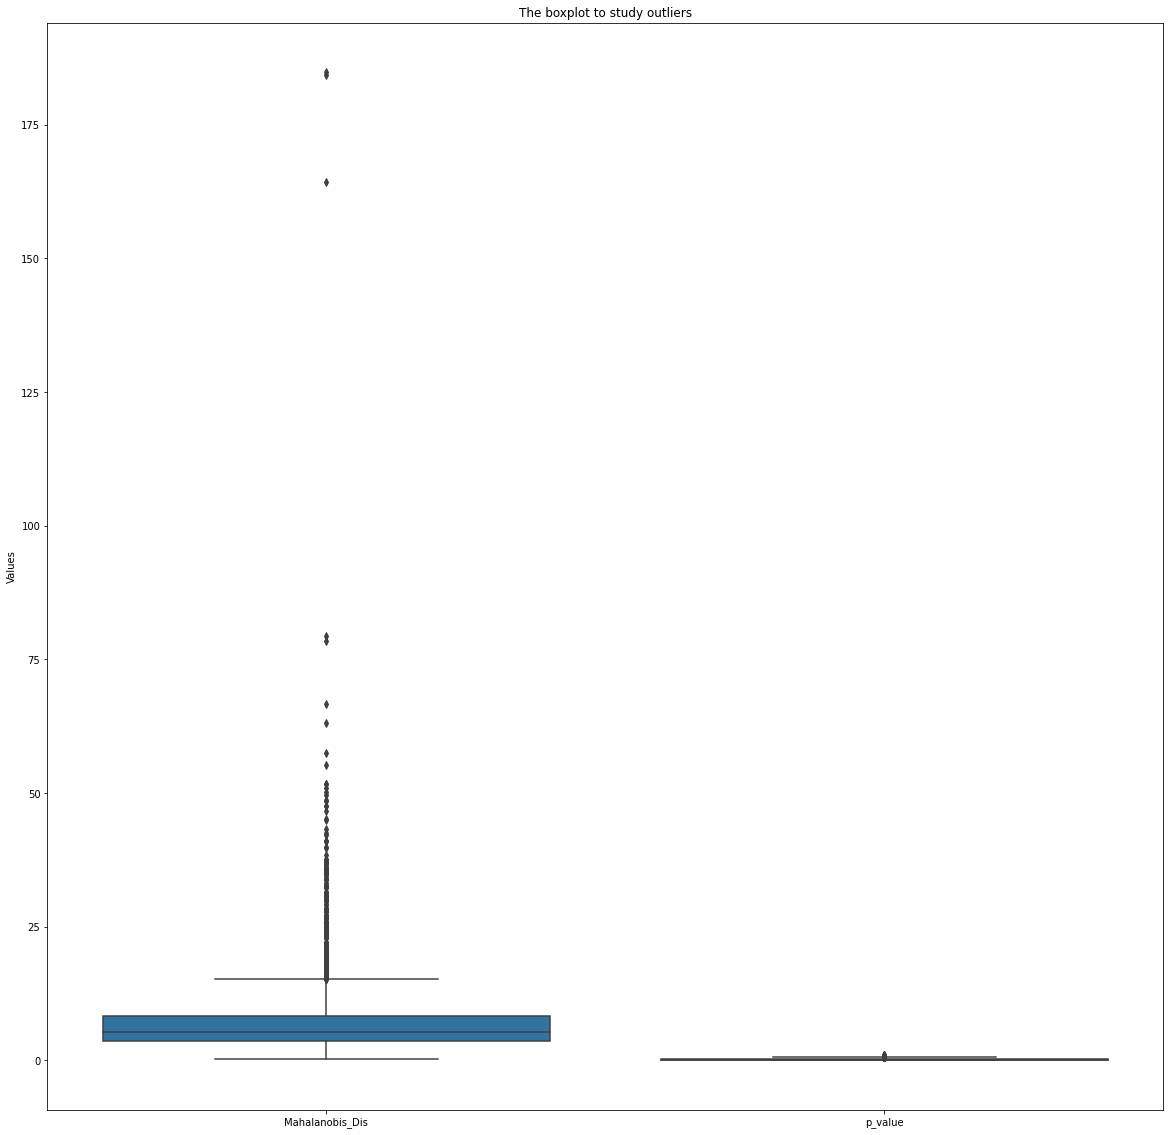

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=numerical_data[['Mahalanobis_Dis','p_value']])
plt.title('The boxplot to study outliers')
plt.ylabel('Values')

In [ ]:
numerical_data[['Mahalanobis_Dis','p_value']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mahalanobis_Dis,5073.0,6.998620,7.336381,0.294349,3.571667,5.268676,8.233247,184.839260
p_value,5073.0,0.206453,0.197133,0.000000,0.041429,0.153148,0.311585,0.961088


In [ ]:
numerical_data[numerical_data['p_value']<0.001]

,DaySinceLastOrder,OrderAmountHikeFromlastYear,Tenure,OrderCount,CouponUsed,HourSpendOnApp,WarehouseToHome,Mahalanobis_Dis,p_value
10,8.000000,15.830794,4.0,15.0,9.000000,2.0,18.000000,23.877193,2.649894e-05
21,6.000000,12.000000,20.0,15.0,11.000000,3.0,29.000000,30.773452,9.487226e-07
28,15.000000,18.000000,18.0,1.0,1.000000,2.0,15.969462,18.388018,3.657952e-04
53,7.000000,25.000000,19.0,15.0,4.000000,3.0,6.000000,37.204240,4.165561e-08
62,15.000000,11.000000,28.0,2.0,0.973987,3.0,20.000000,18.872774,2.904682e-04
...,...,...,...,...,...,...,...,...,...
5532,10.000000,26.000000,13.0,8.0,1.000000,3.0,16.000000,18.332787,3.755256e-04
5534,1.000000,16.062564,61.0,2.0,1.000000,4.0,28.000000,47.684150,2.485895e-10
5574,11.019276,24.000000,21.0,13.0,10.000000,3.0,32.000000,26.787313,6.523831e-06
5605,11.000000,24.000000,15.0,2.0,2.000000,3.0,35.000000,16.478089,9.047193e-04


Dari hasil chi squared test didapatkan sebanyak 266 baris data yangg memiliki nilai pvalue < 0.001 yang tergolong sebagai outlier, maka untuk data tersebut akan dihapus.

In [ ]:
data_out['Mahalanobis_Dis'] = numerical_data['Mahalanobis_Dis']
data_out['p_value'] = numerical_data['p_value']
data_out

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Mahalanobis_Dis,p_value
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,...,Single,9,1,11.0,1.0,1.0,5.000000,159.93,4.325583,0.228386
1,1,8.255998,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,...,Single,7,1,15.0,0.0,1.0,0.000000,120.90,2.980927,0.394575
2,1,8.656640,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,...,Single,6,1,14.0,0.0,1.0,3.000000,120.28,5.649350,0.129974
3,1,0.000000,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,...,Single,8,0,23.0,0.0,1.0,3.000000,134.07,8.434177,0.037841
4,1,0.000000,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,...,Single,3,0,11.0,1.0,1.0,3.000000,129.60,3.628556,0.304468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,5.000000,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,...,Single,2,0,20.0,2.0,2.0,3.598384,224.36,4.386233,0.222665
5624,0,1.000000,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,...,Single,2,0,19.0,2.0,2.0,1.000000,154.66,5.395190,0.145044
5626,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,...,Married,6,0,16.0,1.0,2.0,4.048037,224.91,0.492522,0.920531
5627,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,...,Married,3,1,21.0,1.0,2.0,4.000000,186.42,3.908849,0.271477


In [ ]:
data_out = data_out[(data_out['p_value'] >= 0.001)]
data_out.drop(['Mahalanobis_Dis','p_value'], axis=1, inplace= True)
data_out

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,159.93
1,1,8.255998,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.000000,120.90
2,1,8.656640,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.000000,120.28
3,1,0.000000,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134.07
4,1,0.000000,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.000000,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,5.000000,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,3.598384,224.36
5624,0,1.000000,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.000000,154.66
5626,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.048037,224.91
5627,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186.42


Jumlah data final setelah dilakukan handling outlier sebanyak 4807 baris data. Dataset dengan outlier yang telah dihapus akan digunakan untuk modeling dan dibandingkan dengan model yang menggunakan dataset tanpa outlier dihapus.

## Encoding

Pada tahap ini akan dilakukan encoding terhadap data - data categorikal.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5073 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5073 non-null   int64  
 1   Tenure                       4842 non-null   float64
 2   PreferredLoginDevice         5073 non-null   object 
 3   CityTier                     5073 non-null   int64  
 4   WarehouseToHome              4852 non-null   float64
 5   PreferredPaymentMode         5073 non-null   object 
 6   Gender                       5073 non-null   object 
 7   HourSpendOnApp               4843 non-null   float64
 8   NumberOfDeviceRegistered     5073 non-null   int64  
 9   PreferedOrderCat             5073 non-null   object 
 10  SatisfactionScore            5073 non-null   int64  
 11  MaritalStatus                5073 non-null   object 
 12  NumberOfAddress              5073 non-null   int64  
 13  Complain          

In [ ]:
data["PreferedOrderCat"].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

In [ ]:
data["PreferredPaymentMode"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [ ]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data["PreferredLoginDevice"].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

In [ ]:
data["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal menggunakan encoding. Kali ini akan diggunakan ColumnTransformer untuk dapat mengubah tipe datanya. Metode yang digunakan yaitu onehot encoding karena nilai dari fitur categorikal yang ada paling banyak hanya 5 maka one hot encoding masih cukup baik untuk mengatasinya.

Onehot encoding digunakan untuk fitur PreferedOrderCat', 'PreferredPaymentMode', 'PreferredLoginDevice', 'Gender' dan 'MaritalStatus'. onehot encoding digunakan karena data yang berisi data ketegorik harus dirubah kedalam data numerik agar dapat digunakan. Dengan onehot encodig data dalam suatu fitur akan dikonversi dengan menambahkan kolom dengan jumlah kolom sesuai dengan jumlah variasi nilai data, selanjutnya akan diisikan nilai dengan angka 0 dan 1 sesuai dengan nilai pada datanya. onehot encoding juga lebih baik digunakan untuk data yang berisi sedikit variasi nilai pada datanya sehingga tidak menambah jumlah kolom terlalu banyak dalam data.

In [ ]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredPaymentMode']),
                                 ('imputer median',SimpleImputer(missing_values=np.nan,strategy= 'median'),['HourSpendOnApp']),
                                 ('iterative',IterativeImputer(missing_values=np.nan,initial_strategy = 'most_frequent'),['DaySinceLastOrder','OrderCount','Tenure','WarehouseToHome','CouponUsed','OrderAmountHikeFromlastYear'])
                                 ], remainder = 'passthrough')

In [ ]:
pipeline_median = Pipeline([('imputer median',SimpleImputer(missing_values=np.nan,strategy= 'median')),('robust scaler',RobustScaler())])
pipeline_iterative = Pipeline([('iterative',IterativeImputer(missing_values=np.nan,initial_strategy = 'most_frequent')),('robust scaler',RobustScaler())])

transformer_robust = ColumnTransformer([
                                ('one hot encoder',OneHotEncoder(drop = 'first'),['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredPaymentMode']),
                                ('median',pipeline_median,['HourSpendOnApp']),
                                ('iterative',pipeline_iterative,['DaySinceLastOrder','OrderCount','Tenure','WarehouseToHome','CouponUsed','OrderAmountHikeFromlastYear']),
                                ('robust scaler',RobustScaler(),['CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','CashbackAmount'])
                                 ], remainder = 'passthrough')

Dalam tahap ini dibuat 2 transformer untuk tujuan modeling dikarenakan untuk model yang menggunakan tree dalam algoritmanya lebih baik tidak menggunakan scaling sedangkan untuk model yang tidak menggunakan tree lebih baik menggunakan scaling. Oleh karena itu dibuat 2 transformer dengan pembagian 1 transformer menggunakan scaling dan 1 transformer tanpa menggunakan scaling.

Scaling yang akan digunakan yaitu robust scaler. Robust scaler merupakan metode scaling yang kuat dengan data yang memiliki banyak outlier. Robust Scaler menggunakan rentang inter quartile secara default (rentang antara q1 dan q3). Transformer dengan robust scaler hanya digunakan untuk model logistic regression yang tidak menggunakan basis tree dalam algoritmanya.

## Data Splitting

In [ ]:
X_d = data_out.drop(columns = ['Churn'])
y_d = data_out['Churn']

X = data.drop(columns = ['Churn'])
y = data['Churn']

Dilakukan splitting untuk data yang akan digunakan untuk modeling. Data yang akan digunakan dibagi untuk 2 pengujian yaitu data untuk modeling dengan handling outlier dan data untuk modeling tanpa handling outlier.

#### Train and Test Splitting

Pada tahap ini akan dilakukan splitting data untuk train dan testnya dengan ratio 80:20

In [ ]:
# Splitting data training dan test (80:20)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_d,
    y_d,
    stratify = y_d,
    test_size=0.2,
    random_state = 22)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size=0.2,
    random_state = 22)

## Modeling and Evaluation

Pada model benchmark ini akan dibandingkan hasil performa model dengan menggunakan nilai recall sesuai dengan evaluasi metrics yang telah ditetapkan diawal dengan harapan mampu menekan sekecil mungkin nilai false negative dan mendapatkan nilai recall yang tinggi. Formula recall yaitu:

Recall = (TP) / (TP + FN)

Model yang akan dibandingkan yaitu terdapat 5 model yaitu:
1. Logistic regression
2. Decision Tree
3. Random Forest
4. XGBoost
5. CatBoost

Dari kelima model tersebut akan dipilih model terbaik yang memberikan nilai recall yang tinggi, stabil antara train dan testnya serta standar deviasi yang rendah.

In [ ]:
# Algoritma ML yang digunakan
LR_PIPE = Pipeline([('transformer', transformer_robust),('DT',LogisticRegression(random_state=42))])
DT_PIPE = Pipeline([('transformer', transformer),('DT',DecisionTreeClassifier(random_state=42))])
RF_PIPE = Pipeline([('transformer', transformer),('DT',RandomForestClassifier(random_state=42))])
XGB_PIPE = Pipeline([('transformer', transformer),('DT',XGBClassifier(random_state=42))])
CAT_PIPE = Pipeline([('transformer', transformer),('DT',cb.CatBoostClassifier(random_state=42, logging_level='Silent'))])

#### Model : Benchmark with Handling Outliers

In [ ]:
# Cross-validation
LR_CROSS_VAL_D = cross_val_score(LR_PIPE,X_train_d,y_train_d,cv=10,scoring='recall')
DT_CROSS_VAL_D = cross_val_score(DT_PIPE,X_train_d,y_train_d,cv=10,scoring='recall')
RF_CROSS_VAL_D = cross_val_score(RF_PIPE,X_train_d,y_train_d,cv=10,scoring='recall')
XGB_CROSS_VAL_D = cross_val_score(XGB_PIPE,X_train_d,y_train_d,cv=10,scoring='recall')
CAT_CROSS_VAL_D = cross_val_score(CAT_PIPE,X_train_d,y_train_d,cv=10,scoring='recall')

for model in [LR_PIPE, DT_PIPE, RF_PIPE,XGB_PIPE, CAT_PIPE]:
    model.fit(X_train_d, y_train_d)

LR_PRED = LR_PIPE.predict(X_test_d)
DT_PRED = DT_PIPE.predict(X_test_d)
RF_PRED = RF_PIPE.predict(X_test_d)
XGB_PRED = XGB_PIPE.predict(X_test_d)
CAT_PRED = CAT_PIPE.predict(X_test_d)

mean = [LR_CROSS_VAL_D.mean(), DT_CROSS_VAL_D.mean(), RF_CROSS_VAL_D.mean(), XGB_CROSS_VAL_D.mean(), CAT_CROSS_VAL_D.mean()]
std = [LR_CROSS_VAL_D.std(), DT_CROSS_VAL_D.std(), RF_CROSS_VAL_D.std(), XGB_CROSS_VAL_D.std(), CAT_CROSS_VAL_D.std()]
Recall = [recall_score(y_test_d,LR_PRED),
           recall_score(y_test_d,DT_PRED),
           recall_score(y_test_d,RF_PRED),
           recall_score(y_test_d,XGB_PRED),
           recall_score(y_test_d,CAT_PRED)]
name =['Logistic Regression','Decision Tree','Random Forest','XGBoost','Catboost']

score = pd.DataFrame({
    'nama': name,
    'mean': mean,
    'standar deviasi': std,
    'Recall': Recall
}).sort_values(by='Recall',ascending=False)
score

,nama,mean,standar deviasi,Recall
1,Decision Tree,0.813486,0.052151,0.820988
2,Random Forest,0.794808,0.032701,0.814815
4,Catboost,0.770120,0.038364,0.759259
3,XGBoost,0.600313,0.058641,0.592593
0,Logistic Regression,0.507692,0.061491,0.500000


#### Model : Benchmark without Handling Outliers

In [ ]:
# Cross-validation
LR_CROSS_VAL = cross_val_score(LR_PIPE,X_train_val,y_train_val,cv=10,scoring='recall')
DT_CROSS_VAL = cross_val_score(DT_PIPE,X_train_val,y_train_val,cv=10,scoring='recall')
RF_CROSS_VAL = cross_val_score(RF_PIPE,X_train_val,y_train_val,cv=10,scoring='recall')
XGB_CROSS_VAL = cross_val_score(XGB_PIPE,X_train_val,y_train_val,cv=10,scoring='recall')
CAT_CROSS_VAL = cross_val_score(CAT_PIPE,X_train_val,y_train_val,cv=10,scoring='recall')

for model in [LR_PIPE, DT_PIPE, RF_PIPE,XGB_PIPE, CAT_PIPE]:
    model.fit(X_train_val, y_train_val)

LR_PRED = LR_PIPE.predict(X_test)
DT_PRED = DT_PIPE.predict(X_test)
RF_PRED = RF_PIPE.predict(X_test)
XGB_PRED = XGB_PIPE.predict(X_test)
CAT_PRED = CAT_PIPE.predict(X_test)

mean = [LR_CROSS_VAL.mean(), 
    DT_CROSS_VAL.mean(), RF_CROSS_VAL.mean(), XGB_CROSS_VAL.mean(), CAT_CROSS_VAL.mean()]
std = [LR_CROSS_VAL.std(), 
    DT_CROSS_VAL.std(), RF_CROSS_VAL.std(), XGB_CROSS_VAL.std(), CAT_CROSS_VAL.std()]
Recall = [recall_score(y_test,LR_PRED),
           recall_score(y_test,DT_PRED),
           recall_score(y_test,RF_PRED),
           recall_score(y_test,XGB_PRED),
           recall_score(y_test,CAT_PRED)]
name =['Logistic Regression',
       'Decision Tree','Random Forest','XGBoost','Catboost']

score = pd.DataFrame({
    'nama': name,
    'mean': mean,
    'standar deviasi': std,
    'Recall': Recall
}).sort_values(by='Recall',ascending=False)
score

,nama,mean,standar deviasi,Recall
1,Decision Tree,0.803951,0.038707,0.863095
4,Catboost,0.780246,0.047106,0.809524
2,Random Forest,0.760799,0.048173,0.797619
3,XGBoost,0.609570,0.066454,0.553571
0,Logistic Regression,0.530575,0.051384,0.476190


Dari kelima model tersebut, ternyata model berbasis tree masih jauh lebih baik daripada logistik regression. Berikut adalah visualisasi dari test cross validation model yang berbasis tree.

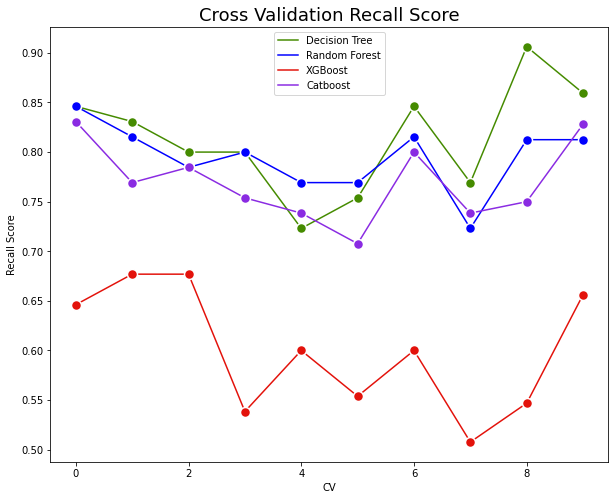

In [ ]:
PURPLE = "#8A2BE2"
GREEN = "#458B00"
BLUE = "#0000FF"
ORANGE = "#FF6103"
RED = "#E3120B"

kfold = list(range(0,len(DT_CROSS_VAL)))
cross_val = [DT_CROSS_VAL_D,RF_CROSS_VAL_D,XGB_CROSS_VAL_D,CAT_CROSS_VAL_D]
COLORS = [GREEN, BLUE, RED, PURPLE]
labels = ['Decision Tree','Random Forest','XGBoost','Catboost']

fig, ax = plt.subplots(figsize=(10, 8))

for model_val, color, label in zip(cross_val, COLORS, labels):
    ax.plot(kfold, model_val, color=color, label=label, lw=1.5)
    ax.legend(loc='upper center')
    ax.scatter(kfold, model_val, fc=color, s=100, lw=1.5, ec="white", zorder=12)

plt.title('Cross Validation Recall Score', fontsize=18, loc='center')
ax.set_xlabel('CV')
ax.set_ylabel('Recall Score')
plt.show()

Berdasarkan hasil prediksi pada train dan test set, Decision Tree memberikan performa yang paling baik dengan score recall yang lebih tinggi dibanding model yang lain. Namun, Decision Tree tidak memberikan nilai yang stabil dibandingkan dengan Catboost. Jika dibandingkan hasil uji performa yang ada, model tanpa handling outlier memberikan performa akhir yang lebih baik untuk nilai recall pada test setnya namun model dengan handling outlier memberikan performa yang lebih stabil antara train dan testnya, sehingga akan diambil model dengan handling outlier dengan hasil berikut:

- Recall Score (Train) : 0.780246	
- Recall Score (Test) : 0.809524
- Standard Deviasi : 0.047106

Selanjutnya akan dilakukan handling imbalance data untuk data 'Churn' dan hyperparameter tuning untuk meningkatkan score recall dengan menggunakan algoritma Catboost.

## Test Handling Imbalance - Desicion Tree

Pada tahap handling imbalance ini akan dicoba untuk 2 metode handling imbalance yaitu undersampling dan oversampling. 
- *Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.*
- *Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.*

In [ ]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    recall = recall_score(y_train, predictions)
    return { 
        'recall': recall        
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    recall = recall_score(y_test, predictions)
    return { 
        'recall': recall        
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=22)

In [ ]:
train_errors_without = []
validation_errors_without = []

train_errors_with_undersampling = []
validation_errors_with_undersampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(X_train_d, y_train_d):
    
    # split data
    X_train_val, X_val = X_train_d.iloc[train_index], X_train_d.iloc[val_index]
    y_train_val, Y_val = y_train_d.iloc[train_index], y_train_d.iloc[val_index]
    
    RUS = RandomUnderSampler(random_state=42)
    X_under, y_under = RUS.fit_resample(X_train_val,y_train_val)
    ROS = RandomOverSampler(random_state=42)
    X_over, y_over = ROS.fit_resample(X_train_val,y_train_val)

    # instantiate model
    dt = DecisionTreeClassifier(random_state=42)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',dt)
    ])

    #calculate errors
    train_error_without, val_error_without = calc_metrics(X_train_val, y_train_val, X_val, Y_val, estimator)
    train_error_with_undersampling, val_error_with_undersampling = calc_metrics(X_under, y_under, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_over, y_over, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without.append(train_error_without)
    validation_errors_without.append(val_error_without)
    
    train_errors_with_undersampling.append(train_error_with_undersampling)
    validation_errors_with_undersampling.append(val_error_with_undersampling)
        
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Handling Imbalance

In [ ]:
listItem = []

for tr,val in zip(train_errors_without,validation_errors_without) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
df_without_handling_imbalance = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(df_without_handling_imbalance.index)
listIndex[-1] = 'Average'
df_without_handling_imbalance.index = listIndex
df_without_handling_imbalance

,Train Recall,Test Recall
0,1.0,0.769231
1,1.0,0.800000
2,1.0,0.861538
3,1.0,0.830769
4,1.0,0.784615
5,1.0,0.892308
6,1.0,0.830769
7,1.0,0.846154
8,1.0,0.875000
9,1.0,0.875000


#### Evaluation Metrics With Undersampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_undersampling,validation_errors_with_undersampling) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
df_with_undersampling = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(df_with_undersampling.index)
listIndex[-1] = 'Average'
df_with_undersampling.index = listIndex
df_with_undersampling

,Train Recall,Test Recall
0,1.0,0.846154
1,1.0,0.907692
2,1.0,0.923077
3,1.0,0.876923
4,1.0,0.923077
5,1.0,0.800000
6,1.0,0.815385
7,1.0,0.938462
8,1.0,0.906250
9,1.0,0.875000


#### Evaluation Metrics With Overrsampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
df_with_oversampling = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(df_with_oversampling.index)
listIndex[-1] = 'Average'
df_with_oversampling.index = listIndex
df_with_oversampling

,Train Recall,Test Recall
0,1.0,0.800000
1,1.0,0.815385
2,1.0,0.830769
3,1.0,0.800000
4,1.0,0.800000
5,1.0,0.861538
6,1.0,0.692308
7,1.0,0.907692
8,1.0,0.875000
9,1.0,0.812500


Berdasarkan hasil pengujian perbandingan metode handling imbalance didapatkan nilai recall terbaik dari metode undersampling. Maka selanjutnya akan dilakukan hyperparam tuning dengan menggunakan algoritma Catboost dan undersampling.

In [ ]:
df_eval1 = df_without_handling_imbalance.T
df_eval2 = df_with_undersampling.T
df_eval3 =df_with_oversampling.T

In [ ]:
df_eval1.rename(columns={'Average':'without'},inplace=True)
df_eval2.rename(columns={'Average':'undersampling'},inplace=True)
df_eval3.rename(columns={'Average':'oversampling'},inplace=True)

In [ ]:
df_eval = pd.concat([df_eval1['without'],df_eval2['undersampling'],df_eval3['oversampling']], axis=1)
df_eval

,without,undersampling,oversampling
Train Recall,1.000000,1.000000,1.000000
Test Recall,0.836538,0.881202,0.819519


## Test Handling Imbalance - Catboost

Pada tahap handling imbalance ini akan dicoba untuk 2 metode handling imbalance yaitu undersampling dan oversampling. 
- *Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.*
- *Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.*

In [ ]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    recall = recall_score(y_train, predictions)
    return { 
        'recall': recall        
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    recall = recall_score(y_test, predictions)
    return { 
        'recall': recall        
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=22)

In [ ]:
train_errors_without = []
validation_errors_without = []

train_errors_with_undersampling = []
validation_errors_with_undersampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(X_train_d, y_train_d):
    
    # split data
    X_train_val, X_val = X_train_d.iloc[train_index], X_train_d.iloc[val_index]
    y_train_val, Y_val = y_train_d.iloc[train_index], y_train_d.iloc[val_index]
    
    RUS = RandomUnderSampler(random_state=42)
    X_under, y_under = RUS.fit_resample(X_train_val,y_train_val)
    ROS = RandomOverSampler(random_state=42)
    X_over, y_over = ROS.fit_resample(X_train_val,y_train_val)

    # instantiate model
    cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',cat)
    ])

    #calculate errors
    train_error_without, val_error_without = calc_metrics(X_train_val, y_train_val, X_val, Y_val, estimator)
    train_error_with_undersampling, val_error_with_undersampling = calc_metrics(X_under, y_under, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_over, y_over, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without.append(train_error_without)
    validation_errors_without.append(val_error_without)
    
    train_errors_with_undersampling.append(train_error_with_undersampling)
    validation_errors_with_undersampling.append(val_error_with_undersampling)
        
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Handling Imbalance

In [ ]:
listItem = []

for tr,val in zip(train_errors_without,validation_errors_without) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
df_without_handling_imbalance = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(df_without_handling_imbalance.index)
listIndex[-1] = 'Average'
df_without_handling_imbalance.index = listIndex
df_without_handling_imbalance

,Train Recall,Test Recall
0,0.958834,0.600000
1,0.939966,0.846154
2,0.948542,0.830769
3,0.950257,0.800000
4,0.960549,0.800000
5,0.955403,0.769231
6,0.951973,0.738462
7,0.955403,0.830769
8,0.958904,0.781250
9,0.953767,0.843750


#### Evaluation Metrics With Undersampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_undersampling,validation_errors_with_undersampling) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
df_with_undersampling = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(df_with_undersampling.index)
listIndex[-1] = 'Average'
df_with_undersampling.index = listIndex
df_with_undersampling

,Train Recall,Test Recall
0,0.998285,0.907692
1,0.994854,0.969231
2,0.998285,0.953846
3,0.993139,0.892308
4,0.998285,0.938462
5,0.994854,0.876923
6,0.996569,0.938462
7,0.998285,0.969231
8,0.996575,0.921875
9,1.000000,0.921875


#### Evaluation Metrics With Overrsampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
df_with_oversampling = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(df_with_oversampling.index)
listIndex[-1] = 'Average'
df_with_oversampling.index = listIndex
df_with_oversampling

,Train Recall,Test Recall
0,0.999652,0.815385
1,0.999652,0.969231
2,1.000000,0.923077
3,1.000000,0.907692
4,1.000000,0.923077
5,0.999653,0.938462
6,1.000000,0.876923
7,1.000000,0.953846
8,1.000000,0.921875
9,0.999305,0.921875


Berdasarkan hasil pengujian perbandingan metode handling imbalance didapatkan nilai recall terbaik dari metode undersampling. Maka selanjutnya akan dilakukan hyperparam tuning dengan menggunakan algoritma Catboost dan undersampling.

In [ ]:
df_eval1 = df_without_handling_imbalance.T
df_eval2 = df_with_undersampling.T
df_eval3 =df_with_oversampling.T

In [ ]:
df_eval1.rename(columns={'Average':'without'},inplace=True)
df_eval2.rename(columns={'Average':'undersampling'},inplace=True)
df_eval3.rename(columns={'Average':'oversampling'},inplace=True)

In [ ]:
df_eval = pd.concat([df_eval1['without'],df_eval2['undersampling'],df_eval3['oversampling']], axis=1)
df_eval

,without,undersampling,oversampling
Train Recall,0.953360,0.996913,0.999826
Test Recall,0.784038,0.928990,0.915144


## Hyperparameter Tuning

In [ ]:
cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
RUS = RandomUnderSampler(random_state=42)

n_estimators = [1000]
learning_rate = [float(x) for x in np.linspace(0.001, 0.1, 20)]

# Hyperparam space XGboost
hyperparam_space_cat = {
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators
    }

In [ ]:
estimator_cat = Pipeline([
        ('RUS',RUS),
        ('preprocessing',transformer),
        ('model', cat)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
grid_cat = GridSearchCV(estimator=estimator_cat,
                     param_grid=hyperparam_space_cat, 
                     cv=5, 
                     scoring='recall', 
                     n_jobs=-1, 
                     verbose=1)

#### Tunning Model Parameter 

Melakukan tunning model dengan menggunakan model CatBoost dan undersampling untuk mencari best score dan best parameternya.

In [ ]:
grid_cat.fit(X_train_d,y_train_d)
print(grid_cat.best_score_)
print(grid_cat.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9290399522957662
{'model__learning_rate': 0.1, 'model__n_estimators': 1000}


In [ ]:
BEF_PIPE = Pipeline(steps = [('RUS',RUS),('preprocessing',transformer),('model',cat)])
BEF_PIPE.fit(X_train_d, y_train_d)

Pipeline(steps=[('RUS', RandomUnderSampler(random_state=42)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'Gender', 'MaritalStatus',
                                                   'PreferedOrderCat',
                                                   'PreferredPaymentMode']),
                                                 ('imputer median',
                                                  SimpleImputer(strategy='median'),
                                                  ['HourSpendOnApp']),
                                                 ('iterative',
                                                  IterativeImputer(initial_strategy='most_frequent'),
       

In [ ]:
best_model = grid_cat.best_estimator_

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
  
    plt.figure(figsize=(10,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes, scoring='recall')
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

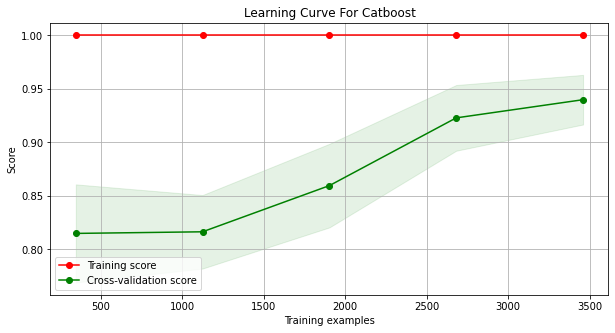

In [ ]:
plot_learning_curve(best_model, 'Learning Curve For Catboost', X_train_d, y_train_d,None, 10)
plt.savefig('7')
plt.show()

### Before and After Tuned Model

Perbandingan performa model CatBoost sebelum dan sesudah dilakukan hyperparameter tuning.

#### Before

In [ ]:
print('classification_report before tuning:\n',classification_report(y_test_d,BEF_PIPE.predict(X_test_d)))
print('Recall', recall_score(y_test_d, BEF_PIPE.predict(X_test_d)))

classification_report before tuning:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       800
           1       0.68      0.94      0.79       162

    accuracy                           0.91       962
   macro avg       0.83      0.93      0.87       962
weighted avg       0.94      0.91      0.92       962

Recall 0.9444444444444444


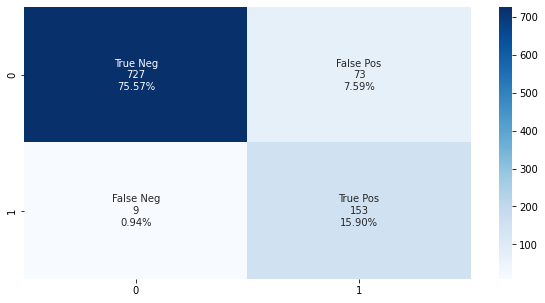

In [ ]:
z=confusion_matrix(y_test_d,BEF_PIPE.predict(X_test_d))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                z.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     z.flatten()/np.sum(z)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(z, annot=labels, fmt='', cmap='Blues')

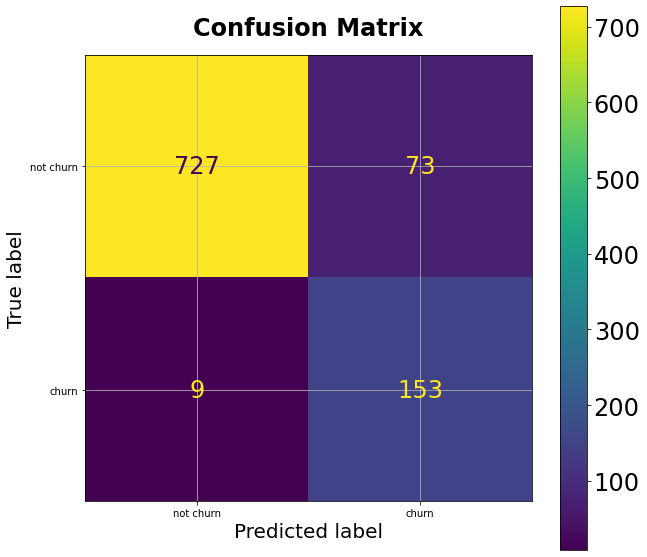

In [ ]:
y_pred = BEF_PIPE.predict(X_test_d)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(BEF_PIPE, X_test_d, y_test_d,display_labels=['not churn','churn'], ax=ax)
plt.grid(b=None)
plt.show()

#### After

In [ ]:
print('classification_report after tuning:\n',classification_report(y_test_d,best_model.predict(X_test_d)))
print('Recall', recall_score(y_test_d, best_model.predict(X_test_d)))

classification_report after tuning:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       800
           1       0.70      0.98      0.82       162

    accuracy                           0.93       962
   macro avg       0.85      0.95      0.88       962
weighted avg       0.95      0.93      0.93       962

Recall 0.9814814814814815


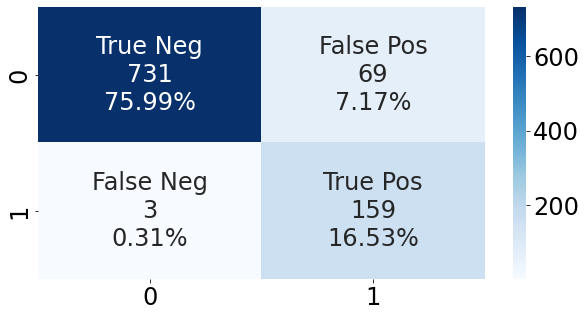

In [ ]:
z=confusion_matrix(y_test_d,best_model.predict(X_test_d))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                z.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     z.flatten()/np.sum(z)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(z, annot=labels, fmt='', cmap='Blues')

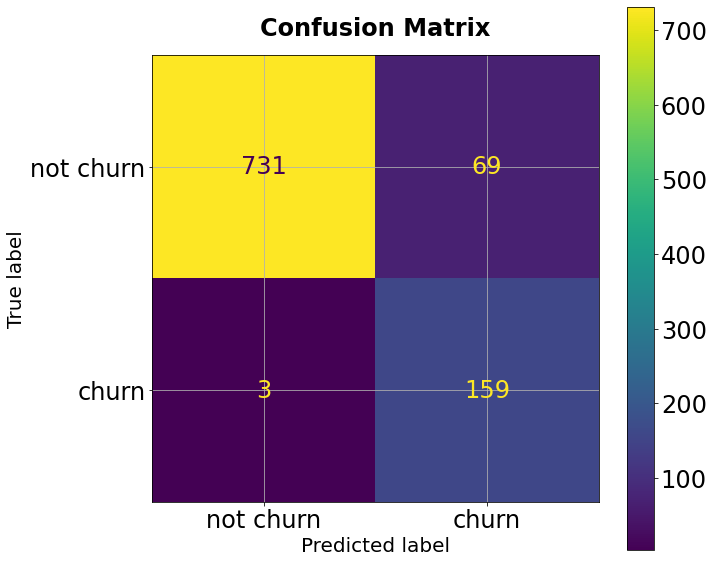

In [ ]:
y_pred = best_model.predict(X_test_d)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(best_model, X_test_d, y_test_d,display_labels=['not churn','churn'], ax=ax)
plt.grid(b=None)
plt.show()

Dari perbanding sebelum dan sesudah di tunning, dapat dilihat model mengalami penurunan performa setelah di hyperparameter tuning walaupun hanya sedikit dengan hasil :
1. Nilai recall naik dari 94,4% menjadi 98,1%
2. Nilai false negative (FN) menurun dari sebanyak 9 menjadi 3

## Feature Importance with SHAP Value

Selanjutnya untuk melihat feature mana saja yang penting dan yang kurang penting, dilakukan feature importance menggunakan permutation importance dan SHAP value.

In [ ]:
model = Pipeline([('transformer', transformer),('model', cb.CatBoostClassifier(random_state=42, logging_level='Silent',learning_rate= 0.1))])
model.fit(X_train_d, y_train_d)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'Gender', 'MaritalStatus',
                                                   'PreferedOrderCat',
                                                   'PreferredPaymentMode']),
                                                 ('imputer median',
                                                  SimpleImputer(strategy='median'),
                                                  ['HourSpendOnApp']),
                                                 ('iterative',
                                                  IterativeImputer(initial_strategy='most_frequent'),
                                                  ['DaySinceLastOrder',

In [ ]:
# transform X_train
X_train_transformed = model.named_steps['transformer'].transform(X_train_d)

# tracing nama kolom
all_var_name = list(transformer.transformers_[0][1].get_feature_names()) + ['HourSpendOnApp','DaySinceLastOrder','OrderCount','Tenure','WarehouseToHome','CouponUsed','OrderAmountHikeFromlastYear','CityTier','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','CashbackAmount']

# convert ke format dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns=all_var_name)

In [ ]:
# transform X_test
X_test_transformed = model.named_steps['transformer'].transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=all_var_name)

In [ ]:
shap_model = model.named_steps['model'].fit(X_train_transformed, y_train_d)
explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(X_test_transformed)

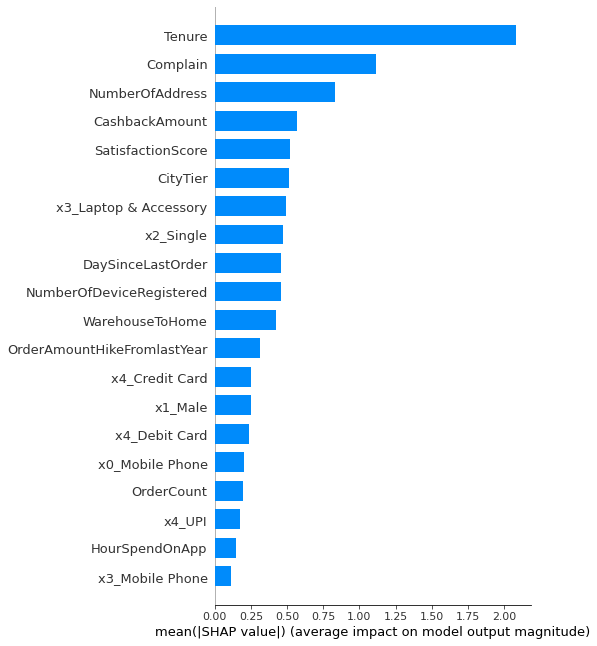

In [ ]:
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar")

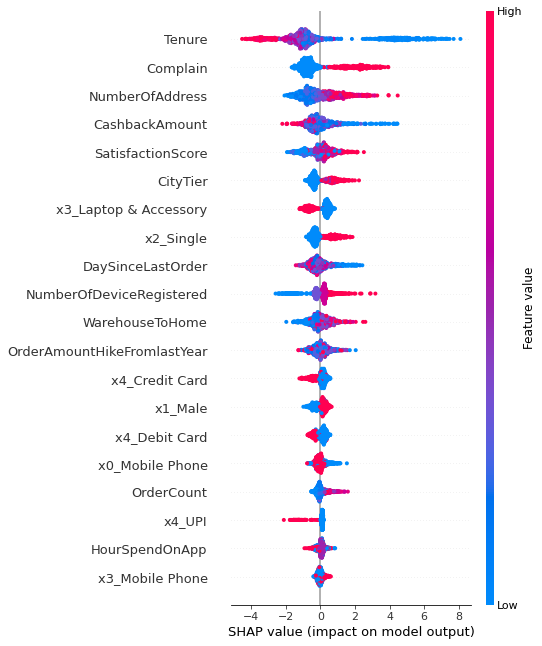

In [ ]:
shap.summary_plot(shap_values, X_test_transformed)

## Top Feature Insight

Kelompok kami memutuskan untuk memilih model Catboost sebagai predicted model. Jika dilihat dari feature importance score dari model Catboost, beberapa feature yang menjadi important predictor adalah feature Tenure, Complain, NumberOfAddress, DaySinceLastOrder, dan MaritalStatus_Single

Berikut merupakan beberapa insight dari feature-feature tersebut:

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/E Commerce Dataset.xlsx', sheet_name='E Comm')

### Handling Duplicate Value

Pada tahap ini akan dilakukan penggabungan untuk feature yang memiliki kesamaan nilai namun terdapat perbedaan dalam penulisannya.

In [ ]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Dalam kolom 'PreferredLoginDevice' yang berarti pelanggan menggunakan perangkat jenis apa dalam mengakses online ecommerce perusahaan terdapat kesamaan makna antara 'Mobile Phone' dengan 'Phone' dimana hal tersebut dapat disatukan / disamakan nilainya menjadi 'Mobile Phone'.

In [ ]:
data.loc[data['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

In [ ]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Dalam kolom 'PreferredPaymentMode' yang berarti pelanggan menggunakan metode pembayaran apa dalam transaksi di online ecommerce perusahaan terdapat kesamaan makna antara 'Credit Card' dengan 'CC' dimana hal tersebut dapat disatukan / disamakan nilainya menjadi 'Credit Card', lalu 'Cash on Delivery' dengan 'COD' dapat disatukan nilainua menjadi 'Cash on Delivery'.

In [ ]:
data.loc[data['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
data.loc[data['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
data['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Dalam kolom 'PreferedOrderCat' yang berarti jenis produk yang banyak dibeli oleh pelanggan di online ecommerce perusahaan terdapat kesamaan makna antara 'Mobile Phone' dengan 'Mobile' dimana hal tersebut dapat disatukan / disamakan nilainya menjadi 'Mobile Phone'.

In [ ]:
data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [ ]:
data['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [ ]:
data['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [ ]:
data['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

### 1. Tenure

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

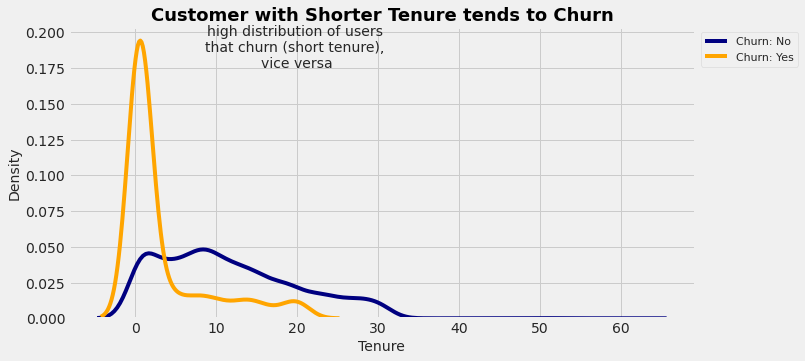

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data[data['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(data[data['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('high distribution of users \nthat churn (short tenure), \nvice versa', 
            xy=(2, 0.2), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

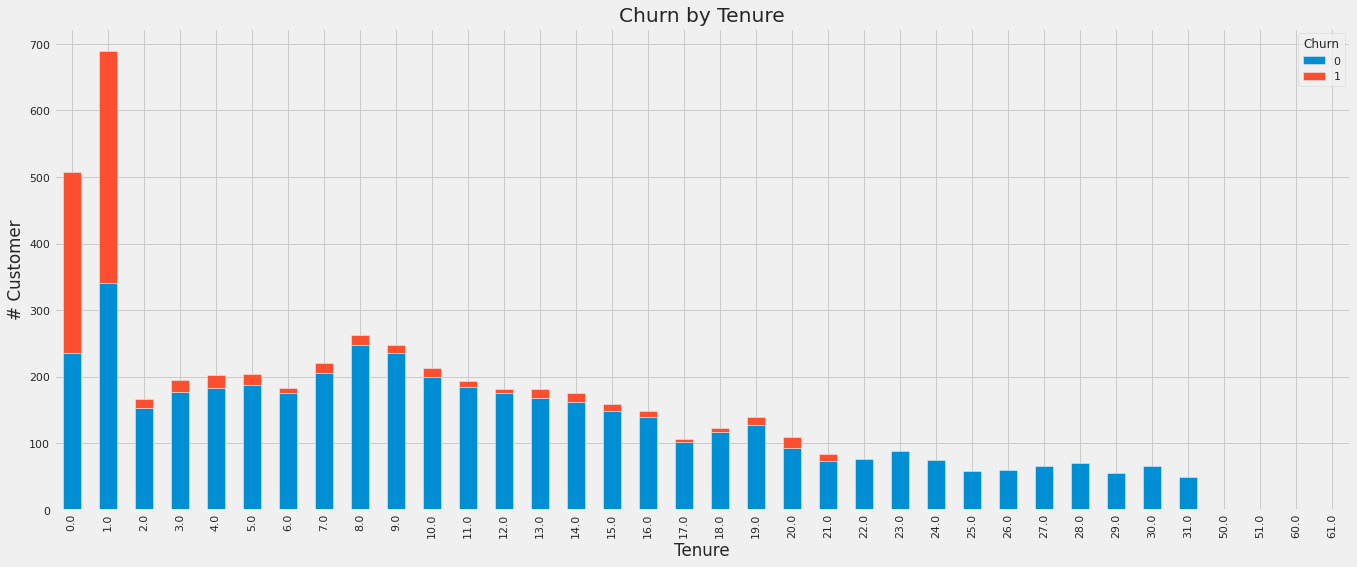

In [ ]:
int_churn_contingency = pd.crosstab(data["Tenure"], data["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

**Insight :**

Customer dengan Tenure rendah (2 bulan pertama) memiliki potensi churn jauh lebih tinggi daripada tenure menengah keatas. 

**business recommendation :**

Memberikan promo kepada customer dengan tenure < 2 bulan. Promo tersebut bisa berupa Coupon agar customer bisa terus bertahan dan kembali berbelanja di e-commerce. Selain itu, handle complain juga dapat membantu mendapatkan pelanggan royal

### 2. Complain

In [ ]:
group_by_complain = data.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

group_by_complain2 = data.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain3 = group_by_complain.merge(group_by_complain2, how='left',
              on='PreferedOrderCat')

group_by_complain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
group_by_complain3['Ratio'] = (group_by_complain3['Num_Customer'] / group_by_complain3['AllCustomer'] * 100.0).round(2)
group_by_complain3

,PreferedOrderCat,Complain,Num_Customer,AllCustomer,Ratio
0,Fashion,Not Complain,584,826,70.70
1,Fashion,Complain,242,826,29.30
2,Grocery,Not Complain,284,410,69.27
3,Grocery,Complain,126,410,30.73
4,Laptop & Accessory,Not Complain,1492,2050,72.78
5,Laptop & Accessory,Complain,558,2050,27.22
6,Mobile Phone,Not Complain,1470,2080,70.67
7,Mobile Phone,Complain,610,2080,29.33
8,Others,Not Complain,196,264,74.24
9,Others,Complain,68,264,25.76


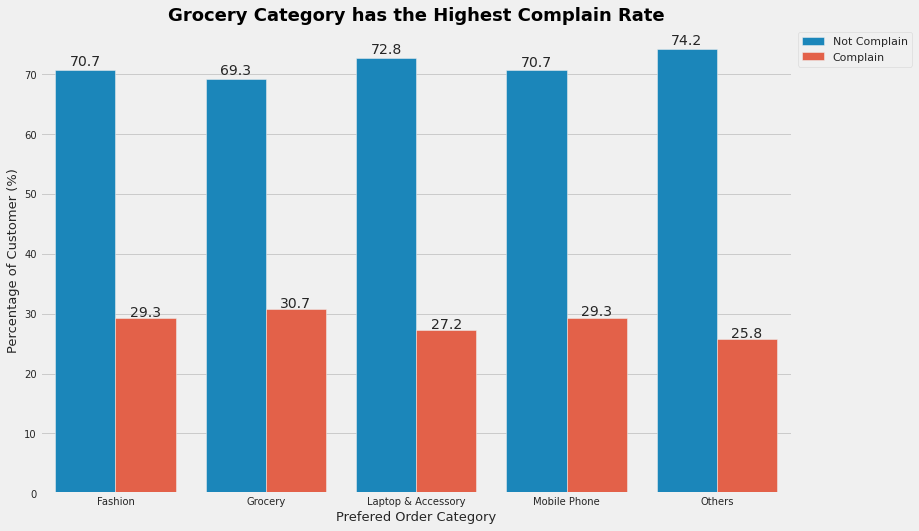

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=group_by_complain3, x='PreferedOrderCat', y='Ratio', hue='Complain')
plt.title('Grocery Category has the Highest Complain Rate', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [ ]:
churn_by_complain = data.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
churn_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
churn_by_complain

,Churn,Complain,CustomerID
0,0,Not Complain,3586
1,0,Complain,1096
2,1,Not Complain,440
3,1,Complain,508


**Insight**

Persentase churn akibat customer complain
(31.67%) hampir 3 kali lebih besar dari
persentase churn total customer yang
tidak complain (10.93%).

**business recommendation**

Mengutamakan customer satisfaction dengan cara membagi customer menjadi 2, yaitu : Priority Customer (customer complain dan berpotensi churn) dan Regular Customers. 


### 3. OrderCategory

In [ ]:
df12= data.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df12_new = data.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
df12_new1 = df12.merge(df12_new, how='left',
              on='PreferedOrderCat')

df12_new1.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
df12_new1['Ratio'] = (df12_new1['Num_Customer'] / df12_new1['AllCustomer'] * 100.0).round(2)
df12_new1

,PreferedOrderCat,Churn,Num_Customer,AllCustomer,Ratio
0,Fashion,0,698,826,84.50
1,Fashion,1,128,826,15.50
2,Grocery,0,390,410,95.12
3,Grocery,1,20,410,4.88
4,Laptop & Accessory,0,1840,2050,89.76
5,Laptop & Accessory,1,210,2050,10.24
6,Mobile Phone,0,1510,2080,72.60
7,Mobile Phone,1,570,2080,27.40
8,Others,0,244,264,92.42
9,Others,1,20,264,7.58


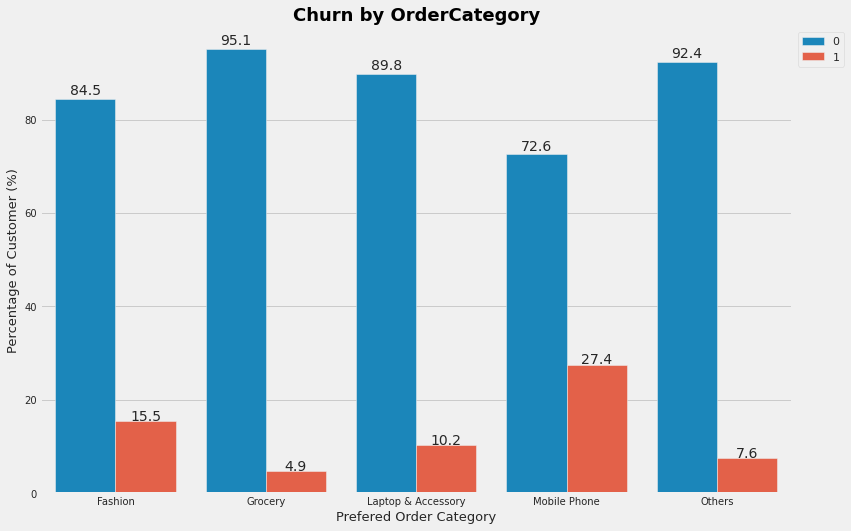

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df12_new1, x='PreferedOrderCat', y='Ratio', hue='Churn')
plt.title('Churn by OrderCategory', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**1. Insight :**

Fashion termasuk barang yang bisa dibeli setiap bulan seharusnya tingkat churn tidak tinggi

**Business Recommendation :**

Memberikan penawaran produk yang berbeda dengan produk yang sudah dibeli oleh customer. 

 *2. Insight :** 

Laptop & Accessorry dan Mobile bukan termasuk barang yang dibeli setiap bulan 

**Business Recommendation :**
Untuk customer yang baru membeli barang elektronik bisa dilakukan cross-selling dengan penawaran aksesoris elektronik, seperti keyboard, mouse, dll. 

## Conclusion

Berdasarkan hasil classification report dari model yang memberikan kinerja recall dan FN rate terbaik yaitu model setelah dilakukan handling imbalance menggunakan undersampling namun tanpa dilakukan hyperparameter tuning maupun feature importance. Dapat disimpulkan bahwa untuk model yang digunakan untuk memprediksi pelanggan mana saja yang berpotensi untuk *Churn* ke aplikasi perusahaan lain, **model yang terpilih dapat mengurangi 95% kandidat pelanggan yang akan benar - benar Churn karena sebelum pelanggan tersebut churn perusahaan dapat memberikan treatment untuk mencegah pelanggan tersebut Churn**. Hal ini sangat berdampak positif bagi perusahaan karena dengan begitu model dapat digunakan untuk menjaga sumber pendapatan perusahaan (pelanggan) dengan cukup akurat sehingga perusahaan dapat meminimalkan biaya yang keluar untuk mencari pelanggan baru dan biaya yang dapat digunakan untuk fokus pada pelanggan yang telah ada agar dapat meningkatkan transaksinya. 

Namun dari model didapatkan sejumlah FN sebanyak **8 pelanggan** yang dapat berpotensi pada hilangnya pelanggan tersebut akibat Churn atau berpindah ke perusahaan lain. Untuk mengatasi hal tersebut perusahaan dapat melakukan langkah preventif kepada seluruh pelanggan tanpa memperhatikan hasil prediksi churn atau tidaknya terlebih dahulu dengan memperhatikan feature importance dari data. Seperti perusahaan dapat memberikan fokusnya kepada pelanggan dengan Tenure < 2 bulan dimana pada periode ini merupakan waktu kritis pelanggan banyak Churn. Bisa jadi memang selama ini perusahaan kurang memberikan perhatian untuk pelanggan dengan jangka waktu tersebut seperti hanya memberikan promo yang menarik untuk pelanggan baru yang pertama kali transaksi dan selanjutnya pelanggan baru akan mendapat promo yang menarik kembali setelah berlangganan dan bertransaksi cukup banyak terlebih dahulu.

### Recommendation

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Melakukan pengecekan dan pengelompokkan atas fitur - fitur mana saja yang memberikan error yang tinggi terhadap target *Churn* sehingga kita dapat melakukan feature engineering yang lebih baik terlebih dahulu terhadap fitur tersebut agar dapat meningkatkan performa model.
2. Melakukan penambahan data dari yang ada saat ini sejumlah sekitar 5000  menjadi lebih banyak. Sehingga model mendapatkan banyak refrensi data yang dipelajari. Penambahan data dapat dilakukan dengan melakukan update data terbaru atau memperbaiki data mentah yang terdapat missing value dengan nilai sebenarnya.
3. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('Churn'), seperti sentimen analisis untuk feedback dari pelanggan, ataupun jumlah transaksi untuk setiap bulannya untuk melihat tren kenaikan atau penurunan yang terjadi dari transaksi pelanggan. 
4. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN) ataupun support vector machine (SVM).
5. Selanjutnya kedepan dari model ini dapat dijadikan sebagai dasar pengembangan untuk model lainnya seperti model untuk mengklasifikasikan jenis pelanggan terhadap barang yang diminati dan jumlah transaksinya. Model tersebut bermanfaat sebagai dasar perencanaan biaya marketing strategy agar dapat optimal terhadap peningkatan pendapatan perusahaan dari transaksi oleh pelanggan. 

Adapun sebagai upaya untuk menjaga agar pelanggan tidak Churn, strategi yang dapat dilakukan oleh perusahaan yaitu:
  1. **Membuat Membership Khusus**. Membuat tingkatan membership terhadap konsumen seperti *silver, gold, platinum* sehingga konsumen yang loyal mendapat poin lebih dan akan merasa menjadi bagian dari layanan. Ini juga memudahkan perusahaan untuk memberikan diskon, promo, dan *privilege* khusus terhadap konsumen yang loyal.
  2. **Memberikan Reward/Hadiah**. Dalam setiap bertransaksi konsumen dapat diberikan poin yang bisa ditukar dengan hadiah bisa berupa barang, kupon, atau penawaran istimewa lainnya. Hal ini berguna untuk menstimulasi kostumer terus menerus bertransaksi menggunakan layanan.
  3. **Memberikan promo diskon / cashback**. Pemberian promo berupa diskon atau cashback mampu memberikan ketertarikan pelanggan agar terus berlangganan dan bertransaksi, namun langkah ini juga harus dianalisis lebih dalam untuk jumlah dan periode waktunya karena dapat berdampak buruk juga jika perusahaan terlalu berlebihan dalam melakukannya.  
  4. **Meningkatkan dukungan konsumen**. Ketika customer mendapatkan dukungan dan arahan penuh dari perusahaan, maka customer lebih mungkin untuk tidak melakukan churn. Misalnya seperti dukungan via telepon, text, video tutorial, in-app customer service, atau blog yang membantu. Dukungan ini memberikan kesan perlindungan dan perhatian lebih terhadap customer sehingga mencegah costumer berpindah ke kompetitor.   
  5. **Monitor Kompetitor**. Analisis kompetitor dan lihat kembali layanan mana yang bisa ditingkatkan lebih baik dari kompetitor. 
  6. **Memperhatikan feedback**. Perhatikan feedback yang didapat dari customer baik yang positif maupun negatif. 
  7. **Menambahkan layanan promosi via mobile phone**. Pergunakan promosi via mobile phone karena customer yang churn maupun tidak lebih banyak login menggunakan mobile phone.
  8. **Meningkatkan Layanan Tambahan**. 2 Bulan pertama merupakan masa paling krusial untuk menjaga customer tetap loyal. Hal ini karena pengguna cenderung churn pada 2 bulan pertama penggunaan. Sehingga untuk mengantisipasi hal tersebut, lebih baik customer diberikan layanan tambahan, seperti UX yang baik, hadiah untuk pembelian pertama, ataupun pemberian diskon eksklusif untuk pelanggan pertama.
  9. **Segmentasi pengguna**. Kebutuhan customer perempuan dan laki-laki bisa jadi berbeda. Kebutuhan customer awal dan customer yang bertahan lebih lama tentu berbeda. Oleh karena itu bentuk segmentasi customer sehingga perusahaan dapat memberikan targeted ads khusus untuk pengguna sesuai segmentasinya. Berikan promosi menarik ketika pengguna meraih milestone tertentu, misal bertahan 10 bulan dapat diberikan hadiah gratis ongkos kirim barang.  
  10. **Bangun Komunitas**. Pada data diatas, pengguna Churn lebih banyak membeli mobile phone. Oleh karena itu lebih baik membuat komunitas di sosial media untuk saling terkoneksi dengan pelanggan lainnya yang membeli produk mobile phone di e-commerce. Hal ini akan mendorong testimonial, update terbaru tentang gadget, dan mendorong customer untuk tidak merasa sendiri. Bentuk lain dari membentuk komunitas mungkin dapat menggunakan membership.